# Importing the important libraries

In [17]:
#for the exploratory data analysis purpose and also for vizualization
import glob

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#for modelling and finding out the correlation in the dataset
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#libraries which are used in the modellling purpose.
import tensorflow as tf





In [18]:
# # Define the directory where the TSV files are located
# directory = "/content/drive/MyDrive/raw_data"

# # Create an empty list to store the loaded dataframes
# dfs = []

# # Get a list of all TSV files in the directory
# file_list = glob.glob(directory + '\\*.tsv')

# # Load all files into a list of DataFrames
# df_list = []
# for filepath in file_list:
#     df = pd.read_csv(filepath, delimiter='\t', low_memory=False)
#     df_list.append(df)

# # Concatenate all DataFrames into a single DataFrame
# df_all = pd.concat(df_list, ignore_index=True)

# # Save the combined DataFrame to a CSV file
# df_all.to_csv('combined_file.csv', index=False)

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# # Randomly sample 25% of the rows
# data = df.sample(frac=0.25, random_state=42)

In [21]:
data = pd.read_csv('/content/drive/MyDrive/half_data')

In [22]:
data.head() #looking at some of the intial columns

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
0,9068869,824814668,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording4,24.09.2020,24.09.2020,15:23:01.300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79080131,9199270471,Eye Tracker,Test group experiment,29.10.2020,Participant0007,Recording30,20.10.2020,20.10.2020,14:30:19.787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,91462984,188303018392,Eye Tracker,Participant0019,05.02.2021,Participant0019,Recording6,05.02.2021,05.02.2021,15:21:58.853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6407203,437055884678,Eye Tracker,Test group experiment,29.10.2020,Participant0005,Recording19,06.10.2020,06.10.2020,16:54:31.067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1145186,1647147846557,Eye Tracker,Participant0053,20.09.2021,Participant0053,Recording8,20.09.2021,20.09.2021,11:20:29.520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.shape #define the shape of the data

(668675, 96)

In [24]:
data.columns

Index(['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'A

# Performing visual Exploratory data analysis

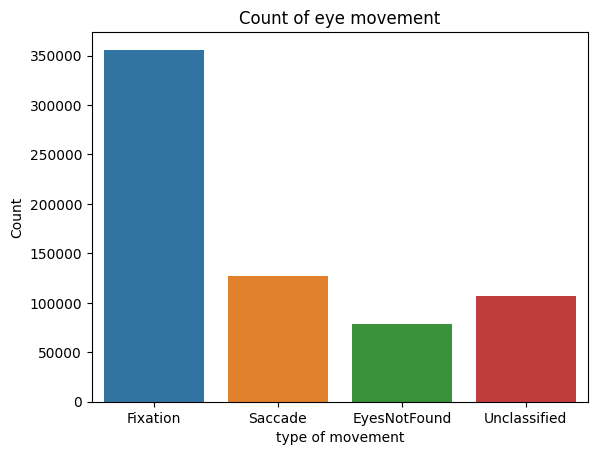

In [25]:
#trying to view the type of category present in the column of the dataset
sns.countplot(x='Eye movement type',data=data)

# Set plot title and labels
plt.title("Count of eye movement")
plt.xlabel("type of movement")
plt.ylabel("Count")

# Display plot
plt.show()

# Column of interest

In [26]:
data['Gaze event duration'].isnull().sum() #this is one of the predictor variable we are trying to predict in order to understand more about the empathy

370

In [27]:
data['Gaze event duration'].head()

0     175.0
1      67.0
2     300.0
3     856.0
4    1308.0
Name: Gaze event duration, dtype: float64

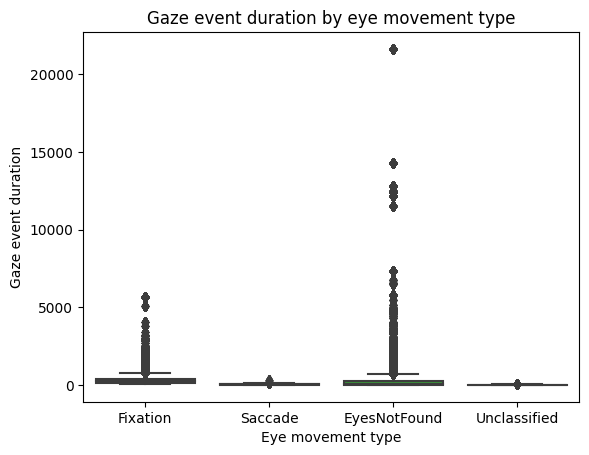

In [28]:
#this particular plot tells us more about the two important characterstic of the data where we have have an idea how these two are related to each other.
sns.boxplot(x="Eye movement type", y="Gaze event duration", data=data)
plt.title('Gaze event duration by eye movement type')
plt.show()


In [29]:
pd.DataFrame(data.groupby('Eye movement type')['Gaze event duration'].mean())

,Gaze event duration
Eye movement type,
EyesNotFound,906.031819
Fixation,341.690416
Saccade,42.807803
Unclassified,24.523663


# Removing column with more than 40% of values present inside them.

In [30]:
#defining the function in order to remove the null values from the data
def removing_columns(data):
  null_values = data.isnull().sum() #creating the object of null values 
  each_column = pd.DataFrame((null_values / data.shape[0]) *100) #finding out the percentages of null values present in the dataset
  selected_col = [col for col in each_column.index if each_column.loc[col][0] <=40] #removing the values which has more than 40% of missing values in them
  #creating new dataframe
  new_data = pd.DataFrame() #created a new dataframe to store the values that we got from removing the values 
  for col in selected_col:
    new_data[col]= data[col]
  return new_data

In [31]:
cleaned_data = removing_columns(data)

In [32]:
cleaned_data.shape

(668675, 60)

In [33]:
cleaned_data.isnull().sum()

Recording timestamp                         0
Computer timestamp                          0
Sensor                                    877
Project name                                0
Export date                                 0
Participant name                            0
Recording name                              0
Recording date                              0
Recording date UTC                          0
Recording start time                        0
Recording start time UTC                    0
Recording duration                          0
Timeline name                               0
Recording Fixation filter name              0
Recording software version                  0
Recording resolution height                 0
Recording resolution width                  0
Recording monitor latency                   0
Eyetracker timestamp                    16700
Gaze point X                            94788
Gaze point Y                            94788
Gaze point left X                 

Replacing string in the contineous variable.

In [34]:
#in some part of the code there is urgent need to change the string we can do it with the help of replace function
# Replace commas with dots in all columns with string values
for col in cleaned_data.columns:
    if cleaned_data[col].dtype == 'O':  # Check if column has object dtype (i.e., contains strings)
        cleaned_data[col] = cleaned_data[col].str.replace(',', '.')  # Replace commas with dots

The task of this particular peice of code is to impute the values in the dataset,but due to computational capacity we will be focusing on other techniques to remove the null values from the dataset.

In [35]:
# import torch
# from torch.utils.data import TensorDataset, DataLoader
# from sklearn.impute import SimpleImputer
# from sklearn.impute import KNNImputer

# def filling_categories(df):
#     # get the names of the categorical columns
#     categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
#     # Create an instance of SimpleImputer with the strategy set to 'most_frequent'
#     imputer1 = SimpleImputer(strategy='most_frequent')
    
#     # Impute the missing values in the categorical columns of the DataFrame
#     df[categorical_cols] = pd.DataFrame(imputer1.fit_transform(df[categorical_cols]), columns=categorical_cols)
    
#     # initialize imputer
#     imputer2 = KNNImputer(n_neighbors=5)
    
#     # identify columns with missing values
#     missing_cols = df.columns[df.isnull().any()].tolist()
    
#     # fit imputer to data
#     imputer2.fit(df[missing_cols])
    
#     # transform missing values
#     df[missing_cols] = imputer2.transform(df[missing_cols])
    
#     # convert DataFrame to PyTorch tensor
#     tensor = torch.tensor(df.values, dtype=torch.float32)
    
#     return tensor




Here we are following a different approach as the data imputation will be next valid process in it but we will be removing all the null values from the dataset becuase that is relatively fast that following the other process.

In [36]:
# df_2 = filling_categories(cleaned_data)

# Completely dropping null values.

In [37]:
cleaned_data = cleaned_data.dropna()

In [38]:
#checking out if there null values left .
cleaned_data.isnull().sum()

Recording timestamp                    0
Computer timestamp                     0
Sensor                                 0
Project name                           0
Export date                            0
Participant name                       0
Recording name                         0
Recording date                         0
Recording date UTC                     0
Recording start time                   0
Recording start time UTC               0
Recording duration                     0
Timeline name                          0
Recording Fixation filter name         0
Recording software version             0
Recording resolution height            0
Recording resolution width             0
Recording monitor latency              0
Eyetracker timestamp                   0
Gaze point X                           0
Gaze point Y                           0
Gaze point left X                      0
Gaze point left Y                      0
Gaze point right X                     0
Gaze point right

As we can see all the null values are completely removed from the dataset

In [39]:
cleaned_data.shape

(393399, 60)

# Correlation Matrix

<ipython-input-40-8e735d7dff22>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cleaned_data.corr()


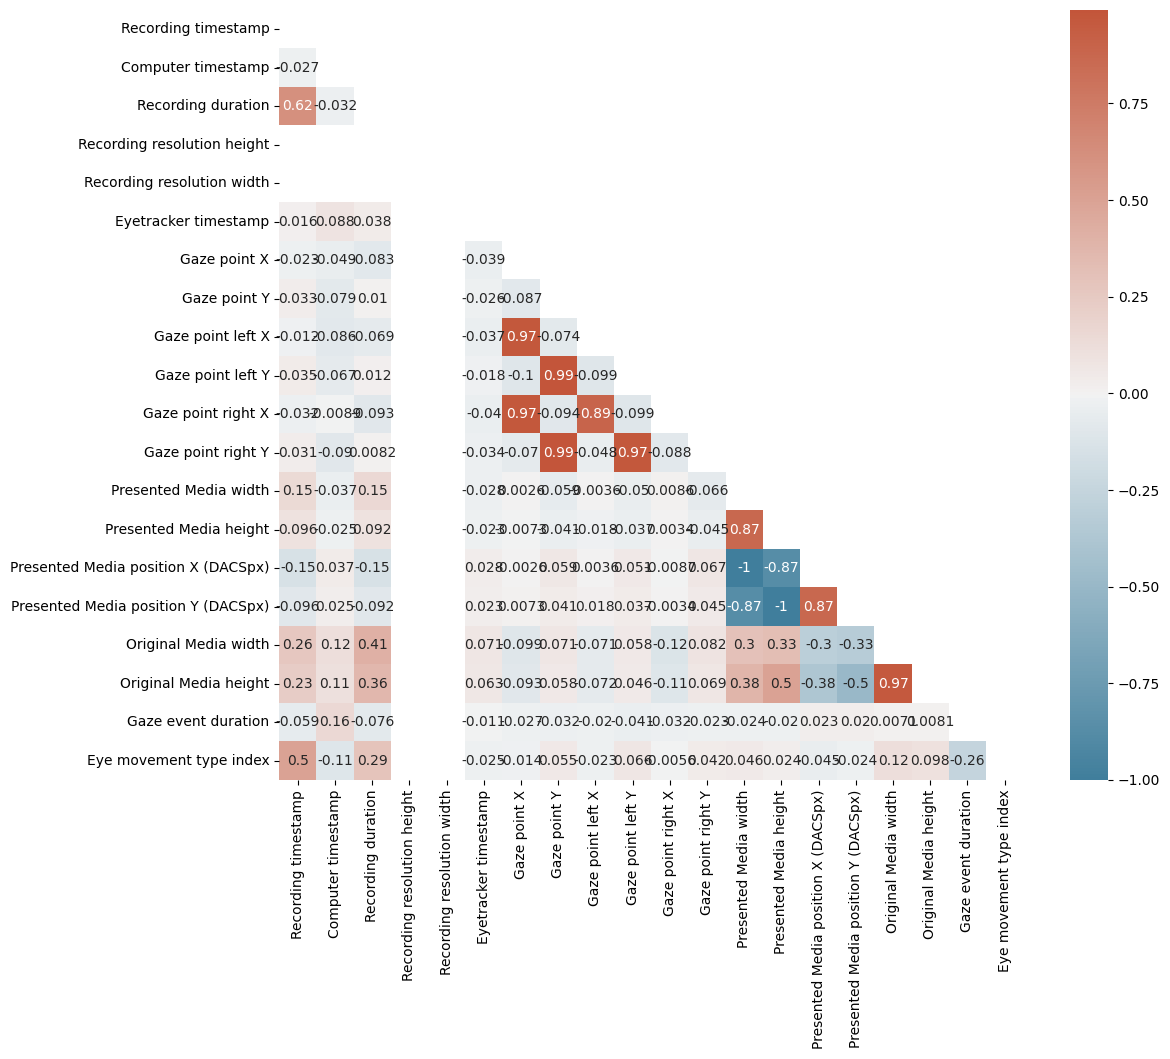

In [40]:
corr_matrix = cleaned_data.corr()
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap=cmap)
plt.show()

In [41]:
# select features highly correlated with the target variable
target_corr = corr_matrix['Gaze event duration'].sort_values(ascending=False)
top_features = target_corr[:41].index.tolist()

# select features highly correlated with each other
high_corr = corr_matrix.abs().stack().reset_index().sort_values(0, ascending=False)
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr = high_corr.drop_duplicates(subset=0)

# select the final set of features
final_features = list(set(top_features) - set(high_corr['level_1']))

print(final_features)

['Recording resolution width', 'Recording resolution height']


In [42]:
#making a copy of cleaned data that will be use further for the analysis purpose
new_data_a = cleaned_data.copy()

# Unsupervised Learning

Performing K-means Clustering.

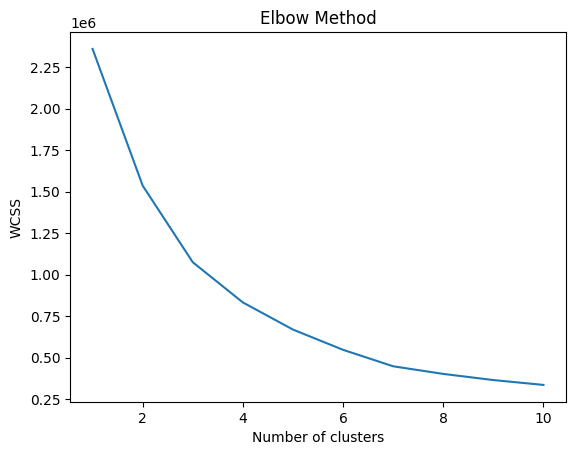

In [43]:
# Select the columns to be used in the clustering analysis
X = cleaned_data[['Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y']]

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

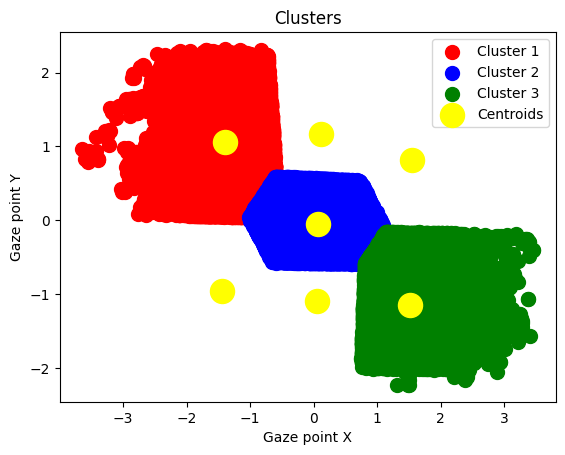

<ipython-input-44-f0b580d00431>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())


Cluster 1 Gaze event duration score: 182.98954703832752
Cluster 2 Gaze event duration score: 384.79094076655053
Cluster 3 Gaze event duration score: 110.22648083623693


In [44]:
# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
cleaned_data['cluster'] = y_kmeans

# Plot the clusters in 2D space
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Gaze point X')
plt.ylabel('Gaze point Y')
plt.legend()
plt.show()

# Calculate the average gaze duration for each cluster
empathy_scores = cleaned_data['Gaze event duration'].unique()
for i in range(3):
    cluster_mean = []
    for score in empathy_scores:
        cluster_mean.append(cleaned_data[cleaned_data['cluster'] == i][cleaned_data['Gaze event duration'] == score]['Gaze event duration'].count())
    print('Cluster', i+1, 'Gaze event duration score:', sum(cluster_mean) / len(cluster_mean))

In [45]:
cleaned_data = cleaned_data.drop('cluster', axis=1)

# Modelling of the data

In [46]:
from sklearn.preprocessing import LabelEncoder

# select categorical columns
cat_cols = cleaned_data.select_dtypes(include='object').columns.tolist()

# initialize label encoder object
label_encoder = LabelEncoder()

# encode categorical columns
for col in cat_cols:
    cleaned_data[col] = label_encoder.fit_transform(cleaned_data[col])


In [47]:
new_data_b = pd.concat([cleaned_data, new_data_a['Gaze event duration']], axis=1)

In [48]:
X = new_data_b.drop('Gaze event duration',axis=1)
y = new_data_b['Gaze event duration']

In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping


# split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


# compile the model
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae', 'mse'])

# train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val), batch_size=128, callbacks=[early_stop])

# evaluate the model on the test set
results = model.evaluate(X_test_scaled, y_test)
print("test loss, test mae, test mse:", results)


Epoch 1/100
1967/1967 [==============================] - 15s 5ms/step - loss: 68443.8281 - mae: 141.2148 - mse: 68443.8281 - val_loss: 56800.7344 - val_mae: 121.8957 - val_mse: 56800.7344
Epoch 2/100
1967/1967 [==============================] - 9s 4ms/step - loss: 59075.3672 - mae: 126.0845 - mse: 59075.3672 - val_loss: 55383.6914 - val_mae: 120.4178 - val_mse: 55383.6914
Epoch 3/100
1967/1967 [==============================] - 8s 4ms/step - loss: 58107.3086 - mae: 123.8220 - mse: 58107.3086 - val_loss: 54690.7969 - val_mae: 117.9854 - val_mse: 54690.7969
Epoch 4/100
1967/1967 [==============================] - 9s 4ms/step - loss: 57391.8672 - mae: 123.0265 - mse: 57391.8672 - val_loss: 53952.8047 - val_mae: 117.9027 - val_mse: 53952.8047
Epoch 5/100
1967/1967 [==============================] - 7s 4ms/step - loss: 56897.1914 - mae: 122.5451 - mse: 56897.1914 - val_loss: 53502.8086 - val_mae: 116.3709 - val_mse: 53502.8086
Epoch 6/100
1967/1967 [==============================] - 9s 4ms/

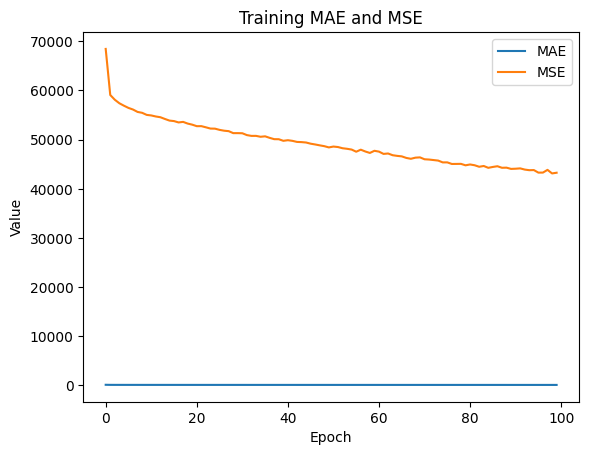

In [50]:
# Get the MAE and MSE values from the history object
mae = history.history['mae']
mse = history.history['mse']

# Plot the MAE and MSE curves
plt.plot(mae, label='MAE')
plt.plot(mse, label='MSE')
plt.title('Training MAE and MSE')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

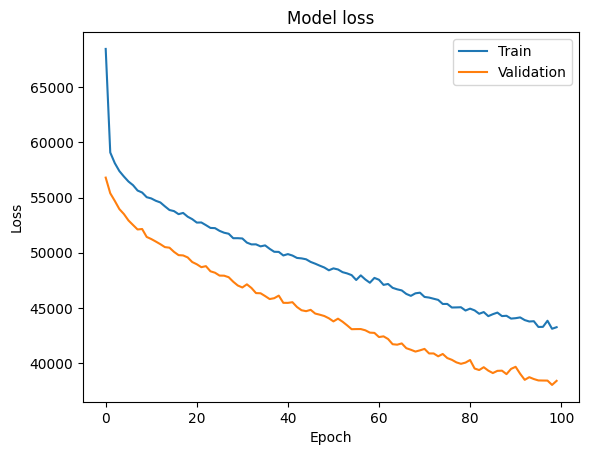

In [51]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Lasso and Ridge Regression.

In [52]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [53]:
# Create Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions on test data using Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Calculate Lasso regression metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
# calculating MAE for Lasso regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression metrics:")
print("Mean Squared Error: ", mse_lasso)
print("R^2 Score: ", r2_lasso)
print("Mean absolute Error:",mae_lasso)

# Create Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on test data using Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Calculate Ridge regression metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
# calculating MAE for Ridge regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)


print("Ridge Regression metrics:")
print("Mean Squared Error: ", mse_ridge)
print("R^2 Score: ", r2_ridge)
print("Mean absolute Error:",mae_ridge)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.022e+09, tolerance: 2.231e+06
  model = cd_fast.enet_coordinate_descent(


Lasso Regression metrics:
Mean Squared Error:  66118.53399259319
R^2 Score:  0.27387086566406227
Mean absolute Error: 145.6709840366092
Ridge Regression metrics:
Mean Squared Error:  65999.80275619047
R^2 Score:  0.27517479974580394
Mean absolute Error: 145.5747398170069


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.47236e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# For Classification 

In [54]:
class_X = new_data_b.drop('Eye movement type',axis=1)
class_y = new_data_b['Eye movement type']

In [55]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#splitting dataset again into the train , validation and test set.
X_train, X_test, y_train, y_test = train_test_split(class_X, class_y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)



# reshape input data for GRU layer
X_train_gru = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_val_gru = np.reshape(X_val, (X_val.shape[0], X_val.shape[1]))
X_test_gru = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))


# Define the model architecture
model = Sequential()

# Add GRU layer
model.add(GRU(64, activation='relu', input_shape=(X_train.shape[1], 1)))


# Add dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add dense output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set early stopping criteria to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(X_train_gru, y_train, epochs=10, batch_size=64, validation_data=(X_val_gru, y_val), callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_gru, y_test)

# Make predictions on test data
y_pred = model.predict(X_test_gru)


Epoch 1/10


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3934/3934 [==============================] - ETA: 0s - loss: nan - accuracy: 0.6215

/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3934/3934 [==============================] - 508s 129ms/step - loss: nan - accuracy: 0.6215 - val_loss: nan - val_accuracy: 0.6254
Epoch 2/10
3934/3934 [==============================] - 514s 131ms/step - loss: nan - accuracy: 0.6222 - val_loss: nan - val_accuracy: 0.6254
Epoch 3/10
3934/3934 [==============================] - 504s 128ms/step - loss: nan - accuracy: 0.6222 - val_loss: nan - val_accuracy: 0.6254
Epoch 4/10
3934/3934 [==============================] - 512s 130ms/step - loss: nan - accuracy: 0.6222 - val_loss: nan - val_accuracy: 0.6254
Epoch 5/10
2459/2459 [==============================] - 32s 13ms/step
